In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
np.random.seed(13)

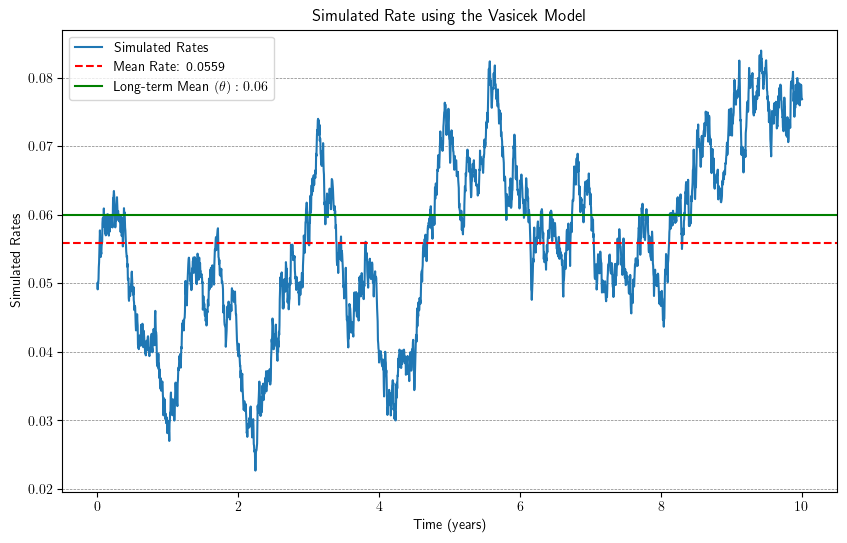

In [2]:
def simulate_vasicek(r0, a, b, sigma, T, dt):
    """
    Simulate interest rate using the Vasicek model.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size

    Returns:
        np.array: Simulated interest rates over time
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    rates = np.zeros(N)
    rates[0] = r0

    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw

    return t, rates

r0 = 0.05  
a = 0.5    
b = 0.06   
sigma = 0.02 
T = 10     
dt = 1/252  
t, rates = simulate_vasicek(r0, a, b, sigma, T, dt)
mean_rates = np.mean(rates)

plt.figure(figsize=(10, 6))
plt.plot(t, rates, label="Simulated Rates", color ='tab:blue')
plt.axhline(y=mean_rates, color='r', linestyle='--', label=f"Mean Rate: {mean_rates:.4f}")
plt.axhline(y=b, color='g', linestyle='-', label=f"Long-term Mean $(\\theta ): {b:.2f}$")
plt.title("Simulated Rate using the Vasicek Model")
plt.xlabel("Time (years)")
plt.ylabel("Simulated Rates")
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.png")
plt.show()
plt.close()

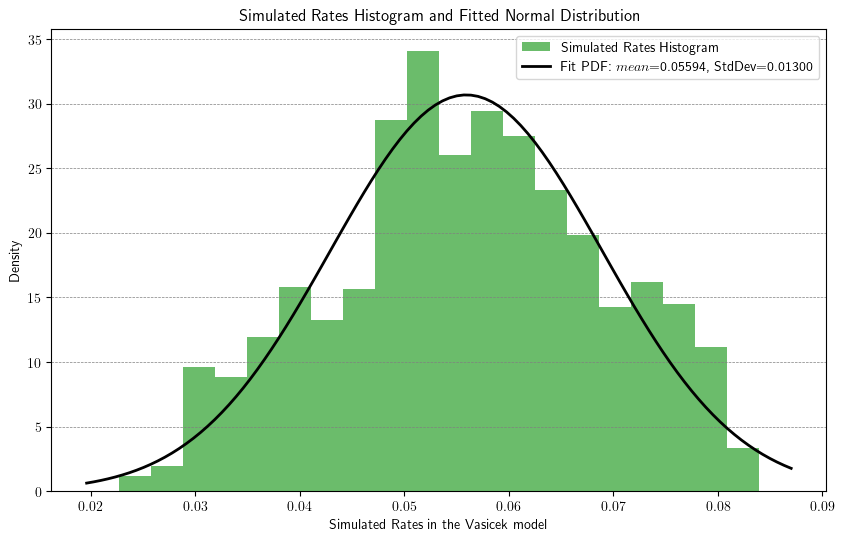

In [3]:
data = np.random.normal(loc=0, scale=1, size=1000)
mu, std = norm.fit(rates) 

plt.figure(figsize=(10, 6))
plt.hist(rates, bins=20, density=True, alpha=0.7, color='tab:green', label='Simulated Rates Histogram')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit PDF: $mean$={mu:.5f}, StdDev={std:.5f}')


plt.xlabel('Simulated Rates in the Vasicek model')
plt.ylabel('Density')
plt.title('Simulated Rates Histogram and Fitted Normal Distribution')
plt.legend()  
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5) 


plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/NormalDistributionPlot.png")  
plt.show()
plt.close()

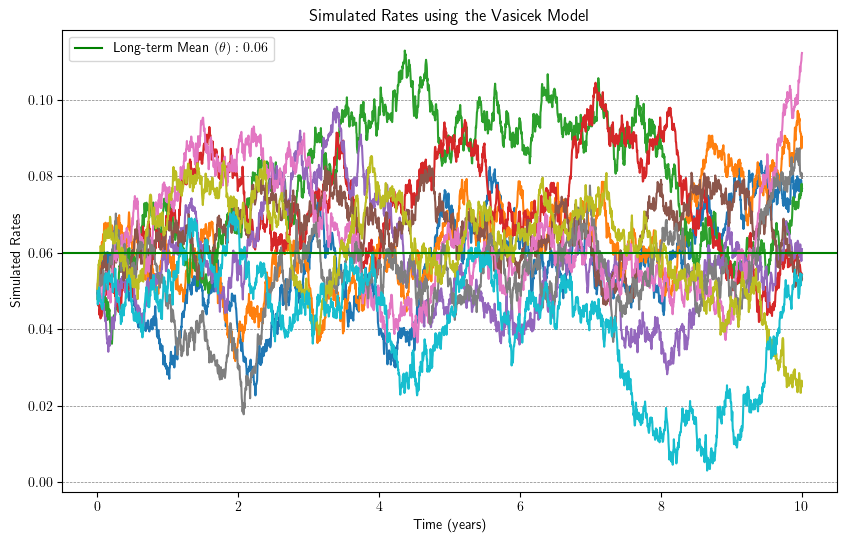

In [11]:
	
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

np.random.seed(13)

def simulate_vasicek(r0, a, b, sigma, T, dt, N, t):
    """
    Simulate interest rate using the Vasicek model with given parameters.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size
        N (int): Number of time steps
        t (np.array): Array of time points

    Returns:
        np.array: Simulated interest rates over time
    """
    rates = np.zeros(N)
    rates[0] = r0
    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw
    return rates


r0 = 0.05  
a = 0.5    
b = 0.06   
sigma = 0.02 
T = 10    
dt = 1/252  
num_simulations = 10  
N = int(T / dt)  
t = np.linspace(0, T, N)  

all_rates = []
for _ in range(num_simulations):
    rates = simulate_vasicek(r0, a, b, sigma, T, dt, N, t)
    all_rates.append(rates)


mean_rates = np.mean(all_rates, axis=0)

plt.figure(figsize=(10, 6))
for rates in all_rates:
    plt.plot(t, rates) 
plt.axhline(y=b, color='g', linestyle='-', label=f"Long-term Mean $(\\theta): {b:.2f}$")
plt.title("Simulated Rates using the Vasicek Model")
plt.xlabel("Time (years)")
plt.ylabel("Simulated Rates")
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlotSIM.png")
plt.show()
plt.close()

In [10]:
	
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

np.random.seed(13)

def simulate_vasicek(r0, a, b, sigma, T, dt, N, t):
    """
    Simulate interest rate using the Vasicek model with given parameters.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size
        N (int): Number of time steps
        t (np.array): Array of time points

    Returns:
        np.array: Simulated interest rates over time
    """
    rates = np.zeros(N)
    rates[0] = r0
    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw
    return rates


r0 = 0.05  
a = 0.5    
b = 0.06   
sigma = 0.02 
T = 10    
dt = 1/252  
num_simulations = 10  
N = int(T / dt)  
t = np.linspace(0, T, N)  

all_rates = []
for _ in range(num_simulations):
    rates = simulate_vasicek(r0, a, b, sigma, T, dt, N, t)
    all_rates.append(rates)


mean_rates = np.mean(all_rates, axis=0)
colors = sns.color_palette("Pastel1", num_simulations)

plt.figure(figsize=(10, 6))
for rates in all_rates:
    plt.plot(t, rates,color=colors[index]) 
plt.axhline(y=b, color='g', linestyle='-', label=f"Long-term Mean $(\\theta): {b:.2f}$")
plt.title("Simulated Rates using the Vasicek Model")
plt.xlabel("Time (years)")
plt.ylabel("Simulated Rates")
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

#plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlotSIM.png")
#plt.show()
#plt.close()

ModuleNotFoundError: No module named 'seaborn'